In [16]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import *
from math import pi
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def apply_ctrl_z(qc:QuantumCircuit, q0:int, q1:int):
    qc.rz(pi/2,q1)
    qc.cx(q0,q1)
    qc.rz(-pi/2,q1)
    qc.cx(q0,q1)

    return

def apply_rx_pi_4(qc:QuantumCircuit, q0:int):
    qc.rz(pi/2,q0)
    qc.sx(q0)
    qc.rz(5*pi/4,q0)
    qc.sx(q0)
    qc.rz(pi/2,q0)

    return

def apply_rx_neg_pi_4(qc:QuantumCircuit, q0:int):
    qc.rz(pi/2,q0)
    qc.sx(q0)
    qc.rz(3*pi/4,q0)
    qc.sx(q0)
    qc.rz(pi/2,q0)

    return

def apply_ctrl_sx(qc:QuantumCircuit, q0:int, q1:int):
    apply_rx_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)
    apply_rx_neg_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)

def apply_ctrl_sx_dg(qc:QuantumCircuit, q0:int, q1:int):
    apply_ctrl_z(qc, q0, q1)
    apply_rx_neg_pi_4(qc,q1)
    apply_ctrl_z(qc, q0, q1)
    apply_rx_pi_4(qc,q1)

In [18]:
def construct_toffoli(qc:QuantumCircuit):
    qc.rz(pi/2,2)
    qc.sx(2)
    qc.rz(pi/2,2)
    
    qc.cx(1,2)
    qc.rz(-pi/4,2)
    qc.cx(0,2)
    qc.rz(pi/4,2)
    qc.cx(1,2)
    qc.rz(-pi/4,2)
    qc.cx(0,2)

    qc.rz(-pi/4,1)

    qc.cx(0,1)
    
    qc.rz(3*pi/4,2)
    qc.sx(2)
    qc.rz(pi/2,2)

    qc.rz(-pi/4,1)

    qc.cx(0,1)
    qc.rz(pi/4,0)
    qc.rz(pi/2,1)

    return

In [19]:
def generateBinaryStrings(ndim:int):
    res = ["0","1"]
    while len(res)<ndim:
        s = res.pop()
        res.insert(0,s+"1")
        res.insert(0,s+"0")

    return res

def getSymmetricPairs(bStringArray:list):
    pair_list = []
    tmp = []
    for s in bStringArray:
        tmp.append(s[::-1])
    d_tmp = bStringArray2DecArray(tmp)
    tmp2 = []
    
    for i in range(len(bStringArray)):
        if d_tmp[i]!=i and i not in tmp2:
            tmp2.append(i)
            tmp2.append(d_tmp[i])
    
    for i in range(len(tmp2)//2):
        pair_list.append([tmp2[2*i],tmp2[2*i+1]])
        
    return pair_list 

def bStringArray2DecArray(bArray:list):
    dArray =[]
    for s in bArray:
        l = len(s)
        res = 0
        for i in range(l):
            res += int(s[i])*2**(l-1-i)
        dArray.append(res)
    return dArray

def qiskitU2textU(unitary:np.ndarray):
    n,m=unitary.shape
    assert m==n
    exchange_pairs = getSymmetricPairs(generateBinaryStrings(n))
    for pair in exchange_pairs:
        reverse_pair = pair[::-1]
        unitary[pair] = unitary[reverse_pair]
        unitary[:,pair] = unitary[:,reverse_pair]
    return unitary

In [20]:
def debug_get_unitary(qc:QuantumCircuit):
    backend = Aer.get_backend("unitary_simulator")
    job = execute(qc, backend=backend)
    unitary = job.result().get_unitary()
    TextUnitary = qiskitU2textU(unitary)
    norm = np.linalg.norm(np.trace(unitary))

    return TextUnitary, unitary, norm

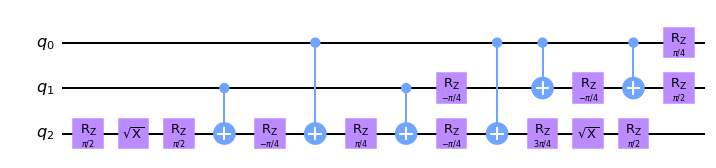

In [21]:
qc = QuantumCircuit(3)

construct_toffoli(qc)
qc.draw("mpl")

In [22]:
textU, _, _ = debug_get_unitary(qc)

In [23]:
print(textU)

[[-3.82683432e-01-9.23879533e-01j  1.41064721e-16-5.32243083e-17j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 1.38777878e-16+8.55535698e-17j -3.82683432e-01-9.23879533e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  -3.82683432e-01-9.23879533e-01j  1.13309145e-16-1.08735460e-16j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+3.00424186e-17j -3.82683432e-01-9.23879533e-01j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00

In [24]:
res = textU/(-3.82683432e-01-9.23879533e-01j)
print(res)

[[ 1.00000000e+00-5.24321526e-10j -4.81028249e-18+1.50694869e-16j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j]
 [-1.32149187e-16+9.54741074e-17j  1.00000000e+00-5.24321474e-10j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j]
 [-0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
   1.00000000e+00-5.24321782e-10j  5.70969329e-17+1.46295259e-16j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j]
 [-0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -2.77555756e-17-1.14967358e-17j  1.00000000e+00-5.24321782e-10j
  -0.00000000e+00-0.00000000e+00j -0.00000000e+00-0.00000000e+00j
  -0.00

In [25]:
simplified = np.zeros((8,8))

In [26]:
for i in range(8):
    for j in range(8):
        if np.linalg.norm(res[i,j]-1)<0.01:
            simplified[i,j] = 1
        if np.linalg.norm(res[i,j])<0.01:
            continue
        simplified[i,j] = res[i,j]

<ipython-input-26-97d26b160d09>:7: ComplexWarning: Casting complex values to real discards the imaginary part
  simplified[i,j] = res[i,j]


In [27]:
simplified

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.]])